<a href="https://colab.research.google.com/github/jss265/595R---Deep-Learning-for-Engineers/blob/main/HW%201%20-%20MLP/HW1_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class VanillaNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(
            nn.Linear(7, 24),
            nn.ReLU(),
            nn.Linear(24, 36),
            nn.ReLU(),
            nn.Linear(36, 1),
        )

    def forward(self, x):
        return self.network(x)

In [3]:
def train(dataloader, model, loss_fn, optimizer):

    model.train()

    num_batches = len(dataloader)
    train_loss = 0

    for X, y in dataloader:

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        train_loss += loss.item() # .item() returns the number 
        
    train_loss /= num_batches
    print(f"Train loss: {train_loss:>8f} \n")

    return train_loss

In [4]:
def test(dataloader, model, loss_fn):

    model.eval()

    num_batches = len(dataloader)
    test_loss = 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item() # .item() returns the number 

    test_loss /= num_batches # average test loss

    print(f"Test loss: {test_loss:>8f} \n")

    return test_loss

In [5]:
def loaddata(batch_size):

    data = np.genfromtxt(
        'auto+mpg/auto-mpg.data',
        usecols=range(8),     # ignore car name
        missing_values='?',   # marks missing values
        filling_values=np.nan # replaces ? with nan
        )
    data = data[~np.isnan(data).any(axis=1)] # removes rows with nan

    features = torch.tensor(data[:, 1:], dtype=torch.float32)
    targets = torch.tensor(data[:, :1].reshape(-1, 1), dtype=torch.float32)
    print(features[0])
    print(features.shape)

    dataset = TensorDataset(features, targets)

    train_ds, test_ds = random_split(dataset, [0.8, 0.2])

    train_dataloader = DataLoader(train_ds, batch_size=batch_size)
    test_dataloader = DataLoader(test_ds, batch_size=batch_size)

    return train_dataloader, test_dataloader

tensor([8.0000e+00, 3.0700e+02, 1.3000e+02, 3.5040e+03, 1.2000e+01, 7.0000e+01,
        1.0000e+00])
torch.Size([392, 7])
Epoch 1
-------------------------------
Train loss: 10930.851172 

Test loss: 7531.416016 

Epoch 2
-------------------------------
Train loss: 5264.523291 

Test loss: 3022.668213 

Epoch 3
-------------------------------
Train loss: 1987.461035 

Test loss: 802.940887 

Epoch 4
-------------------------------
Train loss: 521.361285 

Test loss: 155.874077 

Epoch 5
-------------------------------
Train loss: 201.234424 

Test loss: 293.554214 

Epoch 6
-------------------------------
Train loss: 336.115228 

Test loss: 494.545319 

Epoch 7
-------------------------------
Train loss: 422.642358 

Test loss: 471.246246 

Epoch 8
-------------------------------
Train loss: 352.595441 

Test loss: 320.337921 

Epoch 9
-------------------------------
Train loss: 241.116562 

Test loss: 195.795830 

Epoch 10
-------------------------------
Train loss: 179.594073 

Test 

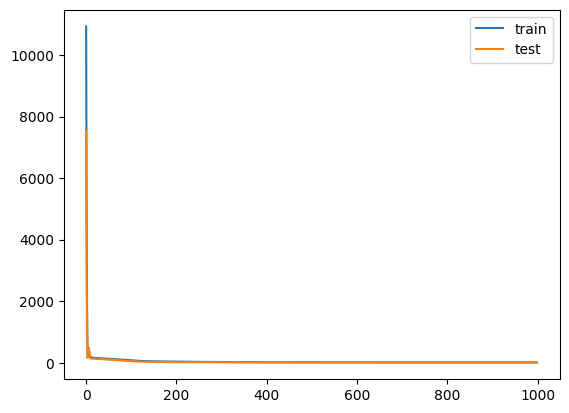

In [6]:
if __name__ == '__main__':

    
    model = VanillaNetwork()
    loss_fn = nn.MSELoss() # objective
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    batch_size = 64
    
    train_dl, test_dl = loaddata(batch_size)

    epochs = 1000
    train_losses = []
    test_losses = []
    
    for e in range(epochs):
        print(f"Epoch {e+1}\n-------------------------------")
        train_loss = train(train_dl, model, loss_fn, optimizer)
        test_loss = test(test_dl, model, loss_fn)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

    plt.figure()
    plt.plot(range(epochs), train_losses)
    plt.plot(range(epochs), test_losses)
    plt.legend(['train', 'test'])
    plt.show()